In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from taigapy import TaigaClient
tc = TaigaClient()
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')

In [3]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation

In [4]:
anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

In [5]:
from cds import plotting

In [6]:
my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value for BUB1B: 0.0005802635400953862
p-value for MAD2L1: 2.7235362597666844e-06


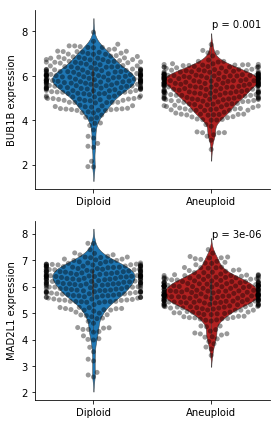

In [7]:
fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index)
temp = public_19Q4_proteincoding_tpm.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'





sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=my_order,palette = my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=my_order)


sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=my_order,palette = my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=my_order)

axx[0].set_xlabel('')
axx[1].set_xlabel('')

axx[0].set_ylabel('BUB1B expression')
axx[1].set_ylabel('MAD2L1 expression')



from scipy import stats
tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'BUB1B (701)'],public_19Q4_proteincoding_tpm.loc[falsee,'BUB1B (701)'])
print('p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)

tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm.loc[falsee,'MAD2L1 (4085)'])
print('p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)





plotting.simpleaxis(axx[0])
plotting.simpleaxis(axx[1])
plt.tight_layout()

plt.savefig('fig2b/expression.pdf')

In [8]:
# get p-values

shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index)
temp = public_19Q4_proteincoding_tpm.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


from scipy import stats
tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'BUB1B (701)'],public_19Q4_proteincoding_tpm.loc[falsee,'BUB1B (701)'])
print('Genne expression p-value for BUB1B: ' + str(p_val))
tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm.loc[falsee,'MAD2L1 (4085)'])
print('Genne expression p-value for MAD2L1: ' + str(p_val))




Genne expression p-value for BUB1B: 0.0005802635400953618
Genne expression p-value for MAD2L1: 2.7235362597666844e-06


In [9]:
## now do fig 2c

In [8]:
from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')

In [9]:
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



In [10]:
public_19Q4_proteincoding_tpm_ = public_19Q4_proteincoding_tpm.copy()
public_19Q4_proteincoding_tpm_.index = anot.loc[public_19Q4_proteincoding_tpm_.index,'CCLE_ID']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.26378027093402934        p = 0.0003888401638310891
MAD2L1 dependency and expression : r = 0.40381940443136033        p = 2.495226526206009e-08


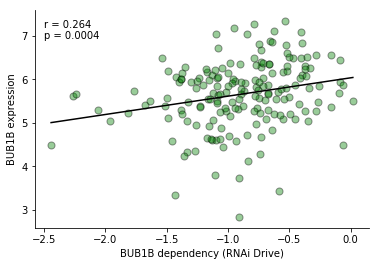

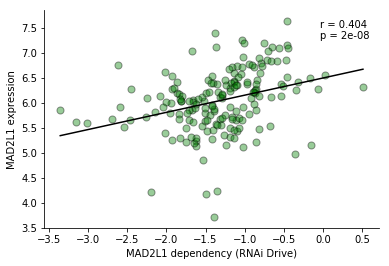

In [15]:

#fix,axx = plt.subplots(2,1,figsize=(5,4.5))


shared = set(public_19Q4_proteincoding_tpm_.index) & set(gene_effect_rnai_drive.index) 
without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'], public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Drive)')
plt.ylabel('BUB1B expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)




plt.savefig('fig2c/bub1b_exp_dep_rnai_drive_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'], public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Drive)')
plt.ylabel('MAD2L1 expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)



plt.savefig('fig2c/mad2l1_exp_dep_rnai_drive_SPEARMAN.pdf')



No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.3613985870208916        p = 2.7696239226739648e-08
MAD2L1 dependency and expression : r = 0.31164662893518275        p = 2.07006029653576e-06


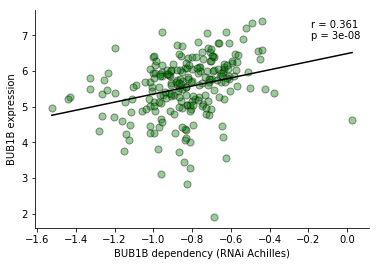

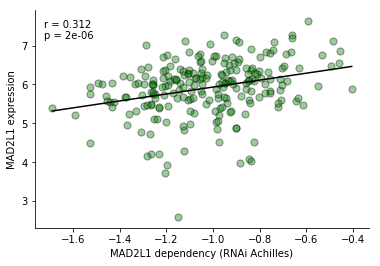

In [17]:

#fix,axx = plt.subplots(2,1,figsize=(5,4.5))


shared = set(public_19Q4_proteincoding_tpm_.index) & set(gene_effect_rnai_achilles.index) 
without_na = gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'], public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Achilles)')
plt.ylabel('BUB1B expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)




plt.savefig('fig2c/bub1b_exp_dep_rnai_achilles_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'], public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Achilles)')
plt.ylabel('MAD2L1 expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)



plt.savefig('fig2c/mad2l1_exp_dep_rnai_achilles_SPEARMAN.pdf')




In [16]:
# import scipy
# r,p = scipy.stats.pearsonr(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
# print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))

# r,p = scipy.stats.pearsonr(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
# print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))

In [72]:
##### make fig2c

In [18]:
sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')

In [19]:
sample_info.index = sample_info.loc[:,'CCLE_Name'] 

In [20]:
sample_info = sample_info[~sample_info.index.duplicated(keep='first')]

In [20]:
bone = sample_info[sample_info.loc[:,'lineage'] == 'bone'].index
breast = sample_info[sample_info.loc[:,'lineage'] == 'breast'].index
colon = sample_info[sample_info.loc[:,'lineage'] == 'colorectal'].index
lung = sample_info[sample_info.loc[:,'lineage'] == 'lung'].index
ovary = sample_info[sample_info.loc[:,'lineage'] == 'ovary'].index

In [21]:
shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index) 
#without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


drive_box = gene_effect_rnai_drive.loc[shared]

drive_box['lineage'] = sample_info.loc[drive_box.index,'lineage']





drive_box['ploidy'] = anot_CCLE.loc[drive_box.index,'many_arm_events']

trus = drive_box[drive_box.loc[:,'ploidy']==True].index 
drive_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = drive_box[drive_box.loc[:,'ploidy']==False].index 
drive_box.loc[falsee,'ploidy']=  'Diploid'

In [22]:
#only lineages we want

to_drop = []

for x in drive_box.index:
    if  drive_box.loc[x,'lineage'] != 'gastric' \
        and drive_box.loc[x,'lineage'] != 'colorectal' and drive_box.loc[x,'lineage'] != 'uterus' \
        and drive_box.loc[x,'lineage'] != 'skin' and drive_box.loc[x,'lineage'] != 'ovary' \
        and drive_box.loc[x,'lineage'] != 'lung'  and drive_box.loc[x,'lineage'] != 'bone':
            to_drop.append(x)
            
drive_box_ = drive_box.drop(to_drop)

In [61]:
drive_box_.replace('central_nervous_system','central nervous system')

,CDH2 (1000),AKT3 (10000),POU5F1P5 (100009667),MED6 (10001),NR2E3 (10002),SIGLEC14 (100049587),ABI1 (10006),KCNE3 (10008),ZBTB33 (10009),GTF2IP4&GTF2IP1 (100093631&2970),...,RCE1 (9986),HNRNPDL (9987),DMTF1 (9988),PPP4R1 (9989),CDH1 (999),PTBP3 (9991),KCNE2 (9992),CASP8AP2 (9994),lineage,ploidy
A2780_OVARY,0.187016,0.102732,0.169881,-0.358048,-0.273283,-0.147842,0.027026,-0.120119,-0.055124,0.328325,...,-0.052606,0.198896,-0.296285,0.061802,0.010974,-0.091133,-0.109102,-0.526021,ovary,Diploid
SW1783_CENTRAL_NERVOUS_SYSTEM,0.309856,0.016771,-0.146169,-0.671776,-0.105457,-0.325552,-0.386658,-0.083919,0.140821,-0.182787,...,0.177056,0.105794,0.108912,0.525993,0.288627,0.098995,0.006073,-0.689751,central\nnervous\nsystem,Diploid
SNU61_LARGE_INTESTINE,0.070578,0.081611,-0.296131,-0.347838,-0.398543,0.075013,-0.252919,0.088084,0.011948,-0.154744,...,0.322994,-0.028823,-0.099063,0.233813,-0.051024,-0.325140,0.138623,-0.693378,colorectal,Aneuploid
LN18_CENTRAL_NERVOUS_SYSTEM,-0.068830,-0.170405,-0.014357,-0.581569,-0.258178,-0.183453,-0.031955,-0.135866,0.073501,0.212810,...,0.025757,-0.090885,0.021431,0.117777,0.108756,-0.064801,0.048791,-0.560555,central\nnervous\nsystem,Aneuploid
LOVO_LARGE_INTESTINE,-0.089857,-0.007829,-0.024905,-0.203365,0.056752,0.043421,-0.204106,0.159323,0.027596,0.018817,...,-0.153446,-0.002580,0.176405,0.107853,0.043511,-0.190377,0.135845,-0.184127,colorectal,Diploid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCK81_LARGE_INTESTINE,0.309094,0.925682,-0.342363,-0.409456,-0.493866,-0.512363,-0.583662,0.480618,-0.119766,0.293044,...,0.443533,0.158444,-1.032268,0.081548,0.243119,-0.322866,0.797919,-0.777920,colorectal,Diploid
HUG1N_STOMACH,-0.256548,-0.455243,-0.356243,0.026388,-0.315515,-0.358636,-0.331972,-0.201353,-0.098236,0.241801,...,0.128524,-0.146631,-0.710360,0.085566,-0.082760,-0.578401,0.132895,-0.426888,gastric,Aneuploid
SNU1_STOMACH,-0.699418,0.122112,-0.576885,-0.071541,-0.657064,0.105777,0.209552,0.319279,0.136285,0.773159,...,-0.102802,-0.106215,-0.155838,-0.609304,-0.046382,-0.567058,0.192378,0.408995,gastric,Diploid
KM12_LARGE_INTESTINE,0.014949,0.067481,0.077869,-0.281448,-0.073805,-0.134378,-0.015618,-0.067609,-0.077636,-0.034003,...,0.086960,-0.090248,-0.096745,-0.067137,-0.078196,-0.052148,0.112814,-0.393778,colorectal,Diploid


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

central
nervous
system_Diploid v.s. central
nervous
system_Aneuploid: t-test independent samples, P_val=9.496e-02 stat=1.866e+00
colorectal_Diploid v.s. colorectal_Aneuploid: t-test independent samples, P_val=3.233e-02 stat=2.285e+00
uterus_Diploid v.s. uterus_Aneuploid: t-test independent samples, P_val=1.570e-02 stat=2.905e+00
ovary_Diploid v.s. ovary_Aneuploid: t-test independent samples, P_val=4.525e-01 stat=7.897e-01
skin_Diploid v.s. skin_Aneuploid: t-test independent samples, P_val=4.729e-02 stat=2.233e+00
gastric_Diploid v.s. gastric_Aneuploid: t-test independent samples, P_val=6.075e-02 stat=2.412e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

central
nervous
system_Diploid v.s. central
nervous
sy

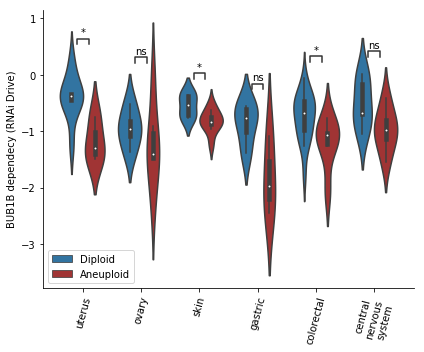

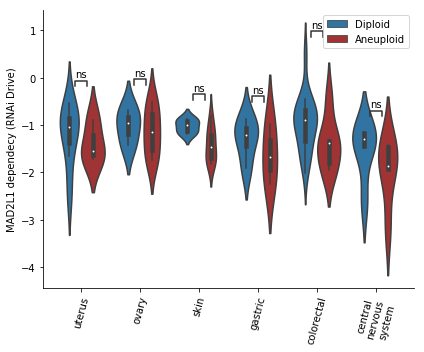

In [25]:

bone = sample_info[sample_info.loc[:,'lineage'] == 'bone'].index
breast = sample_info[sample_info.loc[:,'lineage'] == 'breast'].index
colon = sample_info[sample_info.loc[:,'lineage'] == 'colorectal'].index
lung = sample_info[sample_info.loc[:,'lineage'] == 'lung'].index
ovary = sample_info[sample_info.loc[:,'lineage'] == 'ovary'].index

shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index) 
#without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


drive_box = gene_effect_rnai_drive.loc[shared]

drive_box['lineage'] = sample_info.loc[drive_box.index,'lineage']





drive_box['ploidy'] = anot_CCLE.loc[drive_box.index,'many_arm_events']

trus = drive_box[drive_box.loc[:,'ploidy']==True].index 
drive_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = drive_box[drive_box.loc[:,'ploidy']==False].index 
drive_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want

to_drop = []

for x in drive_box.index:
    if  drive_box.loc[x,'lineage'] != 'uterus' \
        and drive_box.loc[x,'lineage'] != 'ovary' and drive_box.loc[x,'lineage'] != 'skin' \
        and drive_box.loc[x,'lineage'] != 'gastric' and drive_box.loc[x,'lineage'] != 'colorectal' \
        and drive_box.loc[x,'lineage'] != 'central_nervous_system' :
            to_drop.append(x)
            
drive_box_ = drive_box.drop(to_drop)
drive_box_ = drive_box_.replace('central_nervous_system','central\nnervous\nsystem')

lin_order = ['uterus','ovary','skin','gastric','colorectal','central\nnervous\nsystem']
##########################################################################################################
l_order = list(set(drive_box_.loc[:,'lineage']))

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="BUB1B (701)", hue="ploidy",
                     data=drive_box_ ,palette = my_pal,order = lin_order)#palette="muted")

new_pairs = []

for lin in set(drive_box_['lineage'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid")),
    
#     ]
width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)




plt.xticks(rotation=75) 
plt.ylabel('BUB1B dependecy (RNAi Drive)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()
plt.savefig('fig2d/lineages_violin_BUB1B_rnai_drive.pdf')


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="MAD2L1 (4085)", hue="ploidy",
                     data=drive_box_,palette = my_pal,order=lin_order)#palette="muted")


box_pairs=[
    (("skin", "Diploid"), ("skin", "Aneuploid")),
    (("uterus", "Diploid"), ("uterus", "Aneuploid")),
    (("gastric", "Diploid"), ("gastric", "Aneuploid")),
    (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
    (("ovary", "Diploid"), ("ovary", "Aneuploid")),
    (("lung", "Diploid"), ("lung", "Aneuploid")),
    (("bone", "Diploid"), ("bone", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)


plt.xticks(rotation=75) 
plt.ylabel('MAD2L1 dependecy (RNAi Drive)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2d/lineages_violin_MAD2L1_rnai_drive.pdf')



lin_order = ['skin','lung','uterus','gastric','colorectal','ovary','bone']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

bone_Diploid v.s. bone_Aneuploid: t-test independent samples, P_val=nan stat=nan
central
nervous
system_Diploid v.s. central
nervous
system_Aneuploid: t-test independent samples, P_val=4.918e-01 stat=7.017e-01
colorectal_Diploid v.s. colorectal_Aneuploid: t-test independent samples, P_val=2.970e-01 stat=1.100e+00
uterus_Diploid v.s. uterus_Aneuploid: t-test independent samples, P_val=8.103e-02 stat=2.037e+00
ovary_Diploid v.s. ovary_Aneuploid: t-test independent samples, P_val=1.591e-03 stat=3.680e+00
skin_Diploid v.s. skin_Aneuploid: t-test independent samples, P_val=6.018e-01 stat=5.389e-01
gastric_Diploid v.s. gastric_Aneuploid: t-test independent samples, P_val=9.316e-02 stat=1.878e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.0

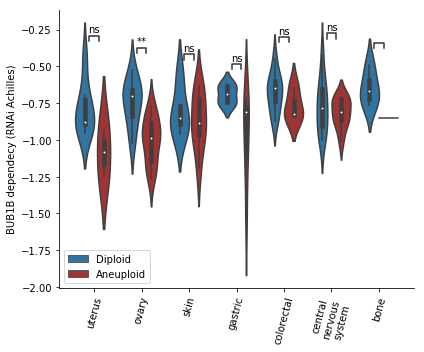

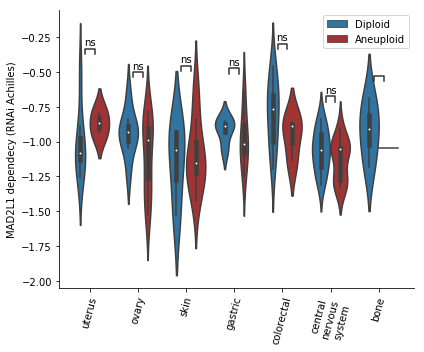

In [26]:

bone = sample_info[sample_info.loc[:,'lineage'] == 'bone'].index
breast = sample_info[sample_info.loc[:,'lineage'] == 'breast'].index
colon = sample_info[sample_info.loc[:,'lineage'] == 'colorectal'].index
lung = sample_info[sample_info.loc[:,'lineage'] == 'lung'].index
ovary = sample_info[sample_info.loc[:,'lineage'] == 'ovary'].index

shared = set(anot_CCLE.index) & set(gene_effect_rnai_achilles.index) 
#without_na = gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


achilles_box = gene_effect_rnai_achilles.loc[shared]

achilles_box['lineage'] = sample_info.loc[achilles_box.index,'lineage']





achilles_box['ploidy'] = anot_CCLE.loc[achilles_box.index,'many_arm_events']

trus = achilles_box[achilles_box.loc[:,'ploidy']==True].index 
achilles_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = achilles_box[achilles_box.loc[:,'ploidy']==False].index 
achilles_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want

to_drop = []

for x in achilles_box.index:
    if  achilles_box.loc[x,'lineage'] != 'uterus' \
        and achilles_box.loc[x,'lineage'] != 'ovary' and achilles_box.loc[x,'lineage'] != 'skin' \
        and achilles_box.loc[x,'lineage'] != 'gastric' and achilles_box.loc[x,'lineage'] != 'colorectal' \
        and achilles_box.loc[x,'lineage'] != 'central_nervous_system' and achilles_box.loc[x,'lineage'] != 'bone' :
            to_drop.append(x)
            
achilles_box_ = achilles_box.drop(to_drop)
achilles_box_ = achilles_box_.replace('central_nervous_system','central\nnervous\nsystem')

lin_order = ['uterus','ovary','skin','gastric','colorectal','central\nnervous\nsystem','bone']
##########################################################################################################
l_order = list(set(achilles_box_.loc[:,'lineage']))

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="BUB1B (701)", hue="ploidy",
                     data=achilles_box_ ,palette = my_pal,order = lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

new_pairs = []

for lin in set(achilles_box_['lineage'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid")),
    
#     ]
width = 0.4
add_stat_annotation(ax, data=achilles_box_, x='lineage', y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)




plt.xticks(rotation=75) 
plt.ylabel('BUB1B dependecy (RNAi Achilles)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2d/lineages_violin_BUB1B_rnai_achilles.pdf')


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="MAD2L1 (4085)", hue="ploidy",
                     data=achilles_box_,palette = my_pal,order=lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")


box_pairs=[
    (("skin", "Diploid"), ("skin", "Aneuploid")),
    (("uterus", "Diploid"), ("uterus", "Aneuploid")),
    (("gastric", "Diploid"), ("gastric", "Aneuploid")),
    (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
    (("ovary", "Diploid"), ("ovary", "Aneuploid")),
    (("lung", "Diploid"), ("lung", "Aneuploid")),
    (("bone", "Diploid"), ("bone", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=achilles_box_, x='lineage', y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)


plt.xticks(rotation=75) 
plt.ylabel('MAD2L1 dependecy (RNAi Achilles)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2d/lineages_violin_MAD2L1_rnai_achilles.pdf')



lin_order = ['skin','lung','uterus','gastric','colorectal','ovary','bone']

In [27]:
from taigapy import TaigaClient
tc = TaigaClient()
CCLE_mutations = tc.get(name='internal-20q1-f1a0', version=8, file='CCLE_mutations')

In [28]:
set(CCLE_mutations.loc[:,'Variant_annotation'])

{None, 'damaging', 'other conserving', 'other non-conserving', 'silent'}

In [29]:
CCLE_mutations

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,ExAC_AF,CGA_WES_AC,SangerWES_AC,SangerRecalibWES_AC,RNAseq_AC,HC_AC,RD_AC,WGS_AC,Variant_annotation,DepMap_ID
0,0,VPS13D,55187,37,1,12359347,12359347,+,Nonsense_Mutation,SNP,...,None,None,34:221,34:213,None,None,None,None,damaging,ACH-000001
1,1,AADACL4,343066,37,1,12726308,12726322,+,In_Frame_Del,DEL,...,None,None,9:0,53:193,None,None,None,28:32,other non-conserving,ACH-000001
2,2,IFNLR1,163702,37,1,24484172,24484172,+,Silent,SNP,...,None,None,118:0,118:0,10:0,None,None,18:0,silent,ACH-000001
3,3,TMEM57,55219,37,1,25785018,25785019,+,Frame_Shift_Ins,INS,...,None,None,None,None,6:28,None,None,None,damaging,ACH-000001
4,4,ZSCAN20,7579,37,1,33954141,33954141,+,Missense_Mutation,SNP,...,None,None,27:61,28:62,None,None,None,None,other non-conserving,ACH-000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300061,1302220,COL4A6,1288,37,X,107400439,107400439,+,None,None,...,None,59:0,None,None,None,None,None,None,None,ACH-003000
1300062,1302221,COL4A5,1287,37,X,107821607,107821607,+,None,None,...,None,95:0,None,None,None,None,None,None,None,ACH-003000
1300063,1302222,GPR112,139378,37,X,135426613,135426613,+,None,None,...,None,48:0,None,None,None,None,None,None,None,ACH-003000
1300064,1302223,SLITRK4,139065,37,X,142717252,142717252,+,None,None,...,None,105:0,None,None,None,None,None,None,None,ACH-003000


NameError: name 'depmap_19Q4_mutation_calls' is not defined

In [30]:
### fig 2e (TP53 mutation)

In [31]:
damaging_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='damaging_mutation')
depmap_19Q4_mutation_calls = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='depmap_19Q4_mutation_calls')
hotspot_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='hotspot_mutation')
other_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='other_mutation')

In [32]:
depmap_19Q4_mutation_calls.index = depmap_19Q4_mutation_calls.loc[:,'DepMap_ID']

In [33]:
tp53 = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'TP53']

In [34]:
shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index) 
shared_depmap = sample_info.loc[shared,'DepMap_ID']
shared_depmap = set(shared_depmap) & set(depmap_19Q4_mutation_calls.index)

In [35]:
muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [36]:
muts.index = anot.loc[muts.index,'CCLE_ID']

In [37]:
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index) & set(muts.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

In [38]:
temp.index = sample_info.loc[temp.index,'DepMap_ID']

In [39]:
muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [40]:
damaging = damaging_mutation[damaging_mutation.loc[:,'TP53 (7157)']==1.0].index

In [41]:
damaging_include = temp.index & damaging

In [42]:
wt_include = muts[muts == 'WT'].index & temp.index

In [43]:
muts_ = muts.drop(muts[muts == 'DAM'].index)
onc_include = muts_[muts_ == 'ONC'].index & temp.index
sil_include = muts_[muts_ == 'SIL'].index & temp.index

In [44]:
temp['mutation status'] = ''

In [45]:
temp.loc[damaging_include,'mutation status'] = 'DAM'
temp.loc[wt_include,'mutation status'] =  'WT'
temp.loc[onc_include,'mutation status'] = 'ONC'
temp.loc[sil_include,'mutation status'] = 'SIL'

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=6.288e-03 stat=-2.844e+00
SIL_Aneuploid v.s. SIL_Diploid: t-test independent samples, P_val=nan stat=nan
ONC_Aneuploid v.s. ONC_Diploid: t-test independent samples, P_val=1.079e-02 stat=-2.613e+00
DAM_Aneuploid v.s. DAM_Diploid: t-test independent samples, P_val=1.434e-02 stat=-2.541e+00


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=3.664e-03 stat=-3.049e+00
SIL_Aneuploid v.s. SIL_Diploid: t-test independent samples, P_val=nan stat=nan
ONC_Aneuploid v.s. ONC_Diploid: t-test independent samples, P_val=1.228e-02 stat=-2.569e+00
DAM_Aneuploid v.s. DAM_Diploid: t-test independent samples, P_val=5.705e-01 stat=-5.714e-01


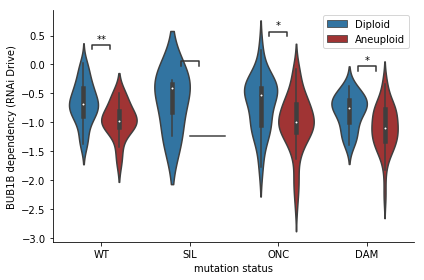

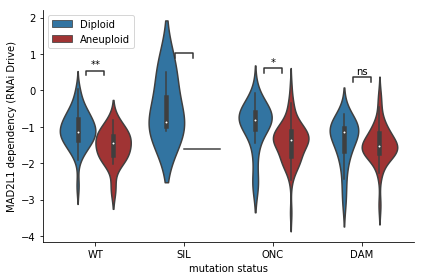

In [46]:
shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index) 
shared_depmap = sample_info.loc[shared,'DepMap_ID']
shared_depmap = set(shared_depmap) & set(depmap_19Q4_mutation_calls.index)



muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


muts.index = anot.loc[muts.index,'CCLE_ID']

shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index) & set(muts.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp.index = sample_info.loc[temp.index,'DepMap_ID']

muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


damaging = damaging_mutation[damaging_mutation.loc[:,'TP53 (7157)']==1.0].index

damaging_include = temp.index & damaging

wt_include = muts[muts == 'WT'].index & temp.index

muts_ = muts.drop(muts[muts == 'DAM'].index)
onc_include = muts_[muts_ == 'ONC'].index & temp.index
sil_include = muts_[muts_ == 'SIL'].index & temp.index

temp['mutation status'] = ''

temp.loc[damaging_include,'mutation status'] = 'DAM'
temp.loc[wt_include,'mutation status'] =  'WT'
temp.loc[onc_include,'mutation status'] = 'ONC'
temp.loc[sil_include,'mutation status'] = 'SIL'

######################################################################################################

ax = sns.violinplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
                     data=temp, order = ['WT','SIL','ONC','DAM'],palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")


box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("SIL", "Diploid"), ("SIL", "Aneuploid")),
    (("ONC", "Diploid"), ("ONC", "Aneuploid")),
    (("DAM", "Diploid"), ("DAM", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="mutation status", y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order = ['WT','SIL','ONC','DAM'])




#ax = sns.swarmplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
#                     data=temp, )#palette="muted")

plotting.simpleaxis(ax)
plt.ylabel('BUB1B dependency (RNAi Drive)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2e/tp53_BUB1B_rnai_drive.pdf')


plt.figure()


ax = sns.violinplot(x="mutation status", y="MAD2L1 (4085)", hue="ploidy",
                     data=temp, order = ['WT','SIL','ONC','DAM'],palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")




box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("SIL", "Diploid"), ("SIL", "Aneuploid")),
    (("ONC", "Diploid"), ("ONC", "Aneuploid")),
    (("DAM", "Diploid"), ("DAM", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="mutation status", y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order = ['WT','SIL','ONC','DAM'])


#ax = sns.swarmplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
#                     data=temp, )#palette="muted")

plotting.simpleaxis(ax)
plt.ylabel('MAD2L1 dependency (RNAi Drive)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc = 'upper left')
plt.tight_layout()
plt.savefig('fig2e/tp53_MAD2L1_rnai_drive.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=1.379e-03 stat=-3.330e+00
SIL_Aneuploid v.s. SIL_Diploid: t-test independent samples, P_val=nan stat=nan
ONC_Aneuploid v.s. ONC_Diploid: t-test independent samples, P_val=6.776e-03 stat=-2.776e+00
DAM_Aneuploid v.s. DAM_Diploid: t-test independent samples, P_val=5.079e-03 stat=-2.911e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=7.740e-04 stat=-3.513e+00
SIL_Aneuploid v.s. SIL_Diploid: t-test independent samples, P_val=nan stat=nan
ONC_Aneuploid v.s. ONC_Diploid: t-test independent samples, P_val=2.978e-03 stat=-3.058e+00
DAM_Aneuploid v.s. DAM_Diploid: t-test independent samples

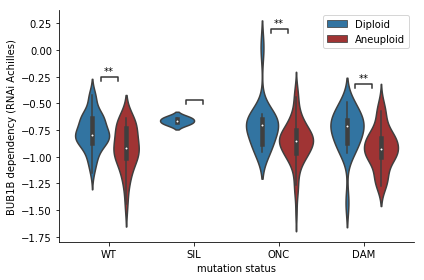

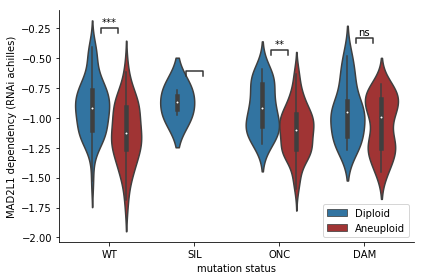

In [47]:
shared = set(anot_CCLE.index) & set(gene_effect_rnai_achilles.index) 
shared_depmap = sample_info.loc[shared,'DepMap_ID']
shared_depmap = set(shared_depmap) & set(depmap_19Q4_mutation_calls.index)



muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


muts.index = anot.loc[muts.index,'CCLE_ID']

shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index) & set(muts.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp.index = sample_info.loc[temp.index,'DepMap_ID']

muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


damaging = damaging_mutation[damaging_mutation.loc[:,'TP53 (7157)']==1.0].index

damaging_include = temp.index & damaging

wt_include = muts[muts == 'WT'].index & temp.index

muts_ = muts.drop(muts[muts == 'DAM'].index)
onc_include = muts_[muts_ == 'ONC'].index & temp.index
sil_include = muts_[muts_ == 'SIL'].index & temp.index

temp['mutation status'] = ''

temp.loc[damaging_include,'mutation status'] = 'DAM'
temp.loc[wt_include,'mutation status'] =  'WT'
temp.loc[onc_include,'mutation status'] = 'ONC'
temp.loc[sil_include,'mutation status'] = 'SIL'

######################################################################################################

ax = sns.violinplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
                     data=temp, order = ['WT','SIL','ONC','DAM'],palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")


box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("SIL", "Diploid"), ("SIL", "Aneuploid")),
    (("ONC", "Diploid"), ("ONC", "Aneuploid")),
    (("DAM", "Diploid"), ("DAM", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="mutation status", y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order = ['WT','SIL','ONC','DAM'])




#ax = sns.swarmplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
#                     data=temp, )#palette="muted")

plotting.simpleaxis(ax)
plt.ylabel('BUB1B dependency (RNAi Achilles)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2e/tp53_BUB1B_rnai_achilles.pdf')


plt.figure()


ax = sns.violinplot(x="mutation status", y="MAD2L1 (4085)", hue="ploidy",
                     data=temp, order = ['WT','SIL','ONC','DAM'],palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")




box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("SIL", "Diploid"), ("SIL", "Aneuploid")),
    (("ONC", "Diploid"), ("ONC", "Aneuploid")),
    (("DAM", "Diploid"), ("DAM", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="mutation status", y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order = ['WT','SIL','ONC','DAM'])


#ax = sns.swarmplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
#                     data=temp, )#palette="muted")

plotting.simpleaxis(ax)
plt.ylabel('MAD2L1 dependency (RNAi achilles)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc='lower right')
plt.tight_layout()
plt.savefig('fig2e/tp53_MAD2L1_rnai_achilles.pdf')

In [65]:
# shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index)
# temp = gene_effect_rnai_drive.loc[shared]
# temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

# trus = temp[temp.loc[:,'ploidy']==True].index 
# temp.loc[trus,'ploidy']= 'Aneuploid'
# falsee = temp[temp.loc[:,'ploidy']==False].index 
# temp.loc[falsee,'ploidy']=  'Diploid'

In [66]:
#temp['dub'] = 0

In [67]:
#temp['dub'] = anot_CCLE.loc[temp.index,'RNAi_doubling_time']

In [68]:
#temp_doubling = temp[temp.loc[:,'dub']== temp.loc[:,'dub']]

In [71]:
# temp['doubling time'] = ''

In [72]:
# below_50 = temp_doubling[temp_doubling.loc[:,'dub'] < 35].index

In [73]:
# _50_to_75 = temp_doubling.drop(below_50)[temp_doubling.drop(below_50).loc[:,'dub'] < 50].index

In [74]:
# _75_to_100 = temp_doubling.drop(list(below_50)+list(_50_to_75))[temp_doubling.drop(list(below_50)+list(_50_to_75)).loc[:,'dub'] < 65].index


In [75]:
# above_100 = temp_doubling[temp_doubling.loc[:,'dub'] >65].index

In [76]:
# temp.loc[below_50,'doubling time'] = '< 35'
# temp.loc[_50_to_75,'doubling time'] = '35-49'
# temp.loc[_75_to_100,'doubling time'] = '50-64'
# temp.loc[above_100,'doubling time'] = '> 64'

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

< 35_Aneuploid v.s. < 35_Diploid: t-test independent samples, P_val=3.678e-04 stat=-3.998e+00
35-49_Aneuploid v.s. 35-49_Diploid: t-test independent samples, P_val=5.912e-02 stat=-1.959e+00
50-64_Aneuploid v.s. 50-64_Diploid: t-test independent samples, P_val=5.770e-02 stat=-2.045e+00
> 64_Aneuploid v.s. > 64_Diploid: t-test independent samples, P_val=2.687e-01 stat=-1.139e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

< 35_Aneuploid v.s. < 35_Diploid: t-test independent samples, P_val=2.233e-02 stat=-2.424e+00
35-49_Aneuploid v.s. 35-49_Diploid: t-test independent samples, P_val=8.663e-03 stat=-2.809e+00
50-64_Aneuploid v.s. 50-64_Diploid: t-test independent samples, P_val=5.458e-02 stat=-2.085e+00
> 64_A

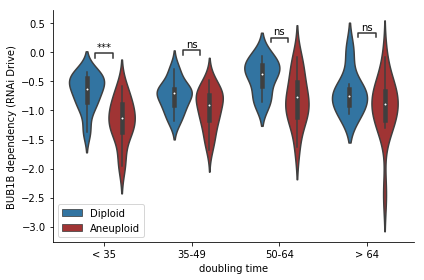

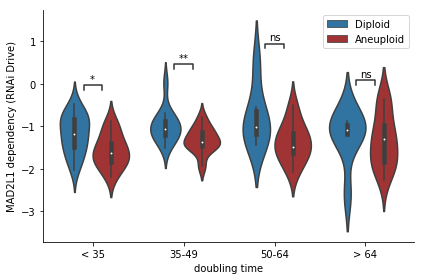

In [48]:
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp['dub'] = 0

temp['dub'] = anot_CCLE.loc[temp.index,'RNAi_doubling_time']

temp_doubling = temp[temp.loc[:,'dub']== temp.loc[:,'dub']]


temp['doubling time'] = ''

below_50 = temp_doubling[temp_doubling.loc[:,'dub'] < 35].index

_50_to_75 = temp_doubling.drop(below_50)[temp_doubling.drop(below_50).loc[:,'dub'] < 50].index

_75_to_100 = temp_doubling.drop(list(below_50)+list(_50_to_75))[temp_doubling.drop(list(below_50)+list(_50_to_75)).loc[:,'dub'] < 65].index


above_100 = temp_doubling[temp_doubling.loc[:,'dub'] >65].index

temp.loc[below_50,'doubling time'] = '< 35'
temp.loc[_50_to_75,'doubling time'] = '35-49'
temp.loc[_75_to_100,'doubling time'] = '50-64'
temp.loc[above_100,'doubling time'] = '> 64'




#############################################################################


ax = sns.violinplot(x="doubling time", y="BUB1B (701)", hue="ploidy",
                     data=temp[temp.loc[:,'doubling time']!=''],order = ['< 35', '35-49','50-64','> 64'] ,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")
plotting.simpleaxis(ax)

box_pairs=[
    (("< 35", "Diploid"), ("< 35", "Aneuploid")),
    (("35-49", "Diploid"), ("35-49", "Aneuploid")),
    (("50-64", "Diploid"), ("50-64", "Aneuploid")),
    (("> 64", "Diploid"), ("> 64", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="doubling time", y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order =  ['< 35', '35-49','50-64','> 64'])





plt.ylabel('BUB1B dependency (RNAi Drive)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()
plt.savefig('fig2g/doubling_time_BUB1B_rnai_drive.pdf')


plt.figure()


ax = sns.violinplot(x="doubling time", y="MAD2L1 (4085)", hue="ploidy",
                     data=temp[temp.loc[:,'doubling time']!=''],order =  ['< 35', '35-49','50-64','> 64'] ,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")
plotting.simpleaxis(ax)

box_pairs=[
    (("< 35", "Diploid"), ("< 35", "Aneuploid")),
    (("35-49", "Diploid"), ("35-49", "Aneuploid")),
    (("50-64", "Diploid"), ("50-64", "Aneuploid")),
    (("> 64", "Diploid"), ("> 64", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="doubling time", y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order =  ['< 35', '35-49','50-64','> 64'])





plt.ylabel('MAD2L1 dependency (RNAi Drive)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2g/doubling_time_MAD2L1_rnai_drive.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

< 35_Aneuploid v.s. < 35_Diploid: t-test independent samples, P_val=4.496e-03 stat=-2.958e+00
35-49_Aneuploid v.s. 35-49_Diploid: t-test independent samples, P_val=3.219e-02 stat=-2.189e+00
50-64_Aneuploid v.s. 50-64_Diploid: t-test independent samples, P_val=1.066e-01 stat=-1.656e+00
> 64_Aneuploid v.s. > 64_Diploid: t-test independent samples, P_val=9.553e-03 stat=-2.681e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

< 35_Aneuploid v.s. < 35_Diploid: t-test independent samples, P_val=1.925e-03 stat=-3.252e+00
35-49_Aneuploid v.s. 35-49_Diploid: t-test independent samples, P_val=5.068e-02 stat=-1.991e+00
50-64_Aneuploid v.s. 50-64_Diploid: t-test independent samples, P_val=4.442e-02 stat=-2.085e+00
> 64_A

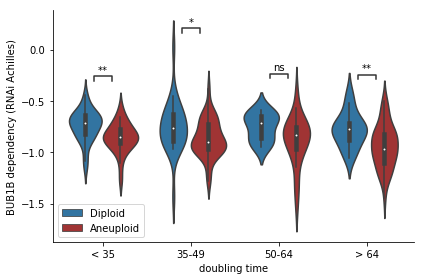

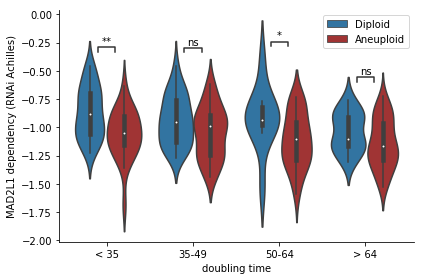

In [49]:
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp['dub'] = 0

temp['dub'] = anot_CCLE.loc[temp.index,'RNAi_doubling_time']

temp_doubling = temp[temp.loc[:,'dub']== temp.loc[:,'dub']]


temp['doubling time'] = ''

below_50 = temp_doubling[temp_doubling.loc[:,'dub'] < 35].index

_50_to_75 = temp_doubling.drop(below_50)[temp_doubling.drop(below_50).loc[:,'dub'] < 50].index

_75_to_100 = temp_doubling.drop(list(below_50)+list(_50_to_75))[temp_doubling.drop(list(below_50)+list(_50_to_75)).loc[:,'dub'] < 65].index


above_100 = temp_doubling[temp_doubling.loc[:,'dub'] >65].index

temp.loc[below_50,'doubling time'] = '< 35'
temp.loc[_50_to_75,'doubling time'] = '35-49'
temp.loc[_75_to_100,'doubling time'] = '50-64'
temp.loc[above_100,'doubling time'] = '> 64'




#############################################################################


ax = sns.violinplot(x="doubling time", y="BUB1B (701)", hue="ploidy",
                     data=temp[temp.loc[:,'doubling time']!=''],order = ['< 35', '35-49','50-64','> 64'] ,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")
plotting.simpleaxis(ax)

box_pairs=[
    (("< 35", "Diploid"), ("< 35", "Aneuploid")),
    (("35-49", "Diploid"), ("35-49", "Aneuploid")),
    (("50-64", "Diploid"), ("50-64", "Aneuploid")),
    (("> 64", "Diploid"), ("> 64", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="doubling time", y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order =  ['< 35', '35-49','50-64','> 64'])





plt.ylabel('BUB1B dependency (RNAi Achilles)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()
plt.savefig('fig2g/doubling_time_BUB1B_rnai_achilles.pdf')


plt.figure()


ax = sns.violinplot(x="doubling time", y="MAD2L1 (4085)", hue="ploidy",
                     data=temp[temp.loc[:,'doubling time']!=''],order =  ['< 35', '35-49','50-64','> 64'] ,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")
plotting.simpleaxis(ax)

box_pairs=[
    (("< 35", "Diploid"), ("< 35", "Aneuploid")),
    (("35-49", "Diploid"), ("35-49", "Aneuploid")),
    (("50-64", "Diploid"), ("50-64", "Aneuploid")),
    (("> 64", "Diploid"), ("> 64", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="doubling time", y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order =  ['< 35', '35-49','50-64','> 64'])





plt.ylabel('MAD2L1 dependency (RNAi Achilles)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2g/doubling_time_MAD2L1_rnai_achilles.pdf')

In [699]:
# for fig 2f need WGD information (ask James where to get that info)

In [24]:
CCLE_ABSOLUTE_combined_table = tc.get(name='ccle-absolute-cn', version=5, file='CCLE_ABSOLUTE_combined_table')

In [25]:
CCLE_ABSOLUTE_combined_table.index = CCLE_ABSOLUTE_combined_table.loc[:,'CCLE_ID']

In [26]:
zero_dups = CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index

In [27]:
sh = set(anot_CCLE.index & zero_dups)
l = len(anot_CCLE.loc[sh].loc[:,'num_arm_events'].dropna())

lows = anot_CCLE.loc[sh].loc[:,'num_arm_events'].dropna().sort_values().iloc[0:int(l*.25)].index
highs = anot_CCLE.loc[sh].loc[:,'num_arm_events'].dropna().sort_values().iloc[int(l*.75):].index

In [1]:
# want to also regress out Het70 scores
#rnai achilles

#for_zero_dups = anot_CCLE.index & gene_effect_rnai_achilles.index & zero_dups


# mu = gene_effect_rnai_achilles.loc[for_zero_dups].mean()
# reg = LinearRegression().fit(np.array(het70_scores_CCLE.loc[for_zero_dups]).reshape(-1, 1), gene_effect_rnai_achilles.loc[for_zero_dups] - mu)
# preds = pd.DataFrame(reg.predict(np.array(het70_scores_CCLE.loc[for_zero_dups]).reshape(-1,1)),index = for_zero_dups,columns = gene_effect_rnai_achilles.columns)

# preds_ = preds 
# gene_effect_rnai_achilles = (gene_effect_rnai_achilles.loc[for_zero_dups] - preds_)+ mu



my_pal2 = {"Low aneuploidy score": "C0", "High aneuploidy score": "firebrick"}
my_order2 = order=['Low aneuploidy score','High aneuploidy score']



fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index) & set(sh)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

#trus = temp[temp.loc[:,'ploidy']==True].index 
trus = set( highs & temp.index)
temp.loc[trus,'ploidy']= 'High aneuploidy score'
#falsee = temp[temp.loc[:,'ploidy']==False].index
falsee = set(lows & temp.index)
temp.loc[falsee,'ploidy']=  'Low aneuploidy score'




my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Low aneuploidy score','High aneuploidy score'],palette=my_pal2)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Low aneuploidy score','High aneuploidy score'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Low aneuploidy score','High aneuploidy score'],palette=my_pal2)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Low aneuploidy score','High aneuploidy score'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()

#axx[0].tick_params(labelrotation=45)
axx[0].set_xticklabels([])
axx[1].tick_params(labelrotation=20,axis='x')

from scipy import stats
tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles.loc[trus,'BUB1B (701)'],gene_effect_rnai_achilles.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False,loc='upper left')
tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles.loc[trus,'MAD2L1 (4085)'],gene_effect_rnai_achilles.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)
plt.savefig('fig2f/rnai_achilles_WGD.pdf')

NameError: name 'gene_effect_rnai_achilles' is not defined

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi drive p-value for BUB1B: 0.16923032692002318
RNAi drive p-value for MAD2L1: 0.5802856383014321


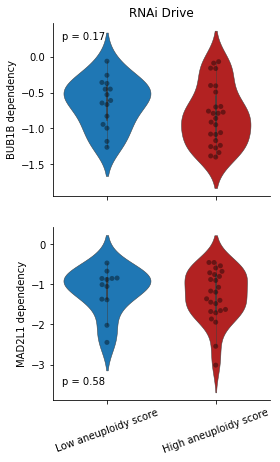

In [55]:
# want to also regress out Het70 scores
#rnai drive

#for_zero_dups = anot_CCLE.index & gene_effect_rnai_drive.index & zero_dups


# mu = gene_effect_rnai_drive.loc[for_zero_dups].mean()
# reg = LinearRegression().fit(np.array(het70_scores_CCLE.loc[for_zero_dups]).reshape(-1, 1), gene_effect_rnai_drive.loc[for_zero_dups] - mu)
# preds = pd.DataFrame(reg.predict(np.array(het70_scores_CCLE.loc[for_zero_dups]).reshape(-1,1)),index = for_zero_dups,columns = gene_effect_rnai_drive.columns)

# preds_ = preds 
# gene_effect_rnai_drive = (gene_effect_rnai_drive.loc[for_zero_dups] - preds_)+ mu



my_pal2 = {"Low aneuploidy score": "C0", "High aneuploidy score": "firebrick"}
my_order2 = order=['Low aneuploidy score','High aneuploidy score']



fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index) & set(sh)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

#trus = temp[temp.loc[:,'ploidy']==True].index 
trus = set( highs & temp.index)
temp.loc[trus,'ploidy']= 'High aneuploidy score'
#falsee = temp[temp.loc[:,'ploidy']==False].index
falsee = set(lows & temp.index)
temp.loc[falsee,'ploidy']=  'Low aneuploidy score'




my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Low aneuploidy score','High aneuploidy score'],palette=my_pal2)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Low aneuploidy score','High aneuploidy score'])
axx[0].set_title('RNAi Drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Low aneuploidy score','High aneuploidy score'],palette=my_pal2)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Low aneuploidy score','High aneuploidy score'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()

#axx[0].tick_params(labelrotation=45)
axx[0].set_xticklabels([])
axx[1].tick_params(labelrotation=20,axis='x')

from scipy import stats
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive.loc[trus,'BUB1B (701)'],gene_effect_rnai_drive.loc[falsee,'BUB1B (701)'])
print('RNAi drive p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,2)),frameon=False,loc='upper left')
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive.loc[trus,'MAD2L1 (4085)'].dropna(),gene_effect_rnai_drive.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi drive p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,2)),frameon=False,loc='lower left')
plt.savefig('fig2f/rnai_drive_WGD.pdf')

In [21]:
full_anot =tc.get(name='aneuploidy-data-d0b9', version=18, file='aneuploidy_data_NEW')

In [22]:
full_anot.index = full_anot.loc[:,'DepMap_ID']

full_anot_CCLE = full_anot.copy()
full_anot_CCLE.index = full_anot.loc[:,'CCLE_ID']

No handles with labels found to put in legend.
No handles with labels found to put in legend.


MAD2L1 dependency and expression : r = -0.30360705569337043        p = 0.0001000916856930443
MAD2L1 dependency and expression : r = -0.2783305185366832        p = 0.00038176125708815566


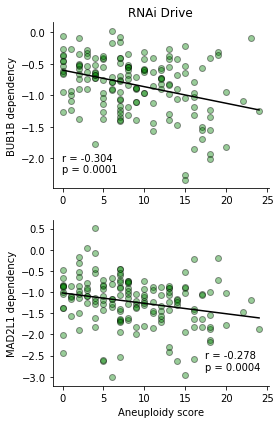

In [30]:
fig,axx = plt.subplots(2,1,figsize=(4,6))

sh = set(full_anot_CCLE.index & gene_effect_rnai_drive.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index)

axx[0].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_drive.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)



axx[1].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('RNAi Drive')
plt.tight_layout()
plt.savefig('fig2f/corr_rnai_drive_SPEARMAN.pdf')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


MAD2L1 dependency and expression : r = -0.3202875126951692        p = 1.1050393316396636e-05
MAD2L1 dependency and expression : r = -0.35956334228421805        p = 6.654424155292308e-07


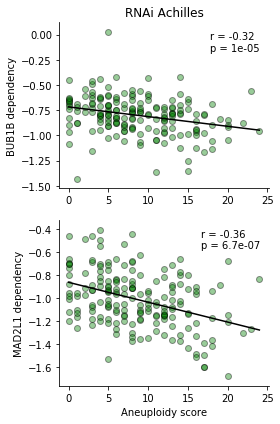

In [31]:
fig,axx = plt.subplots(2,1,figsize=(4,6))

sh = set(full_anot_CCLE.index & gene_effect_rnai_achilles.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index)

axx[0].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,5)),frameon=False)



axx[1].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('RNAi Achilles')
plt.tight_layout()
plt.savefig('fig2f/corr_rnai_achilles_SPEARMAN.pdf')

In [33]:
#CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index


CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'].sort_values()

CCLE_ID
HRT18_LARGE_INTESTINE                     0
SKNAS_AUTONOMIC_GANGLIA                   0
SKNFI_AUTONOMIC_GANGLIA                   0
EB2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    0
RCC4_KIDNEY                               0
                                         ..
KATOIII_STOMACH                           2
NCIH3255_LUNG                             2
PATU8902_PANCREAS                         2
NCIH1869_LUNG                             2
HDQP1_BREAST                              2
Name: Genome doublings, Length: 997, dtype: int64

No handles with labels found to put in legend.
No handles with labels found to put in legend.


MAD2L1 dependency and expression : r = -0.11495777160197485        p = 0.10242676200077094
MAD2L1 dependency and expression : r = 0.020173701974135858        p = 0.7751192738618682


No handles with labels found to put in legend.
No handles with labels found to put in legend.


MAD2L1 dependency and expression : r = -0.074361712345858        p = 0.228524117059638
MAD2L1 dependency and expression : r = -0.04716139417750542        p = 0.4454213471823807


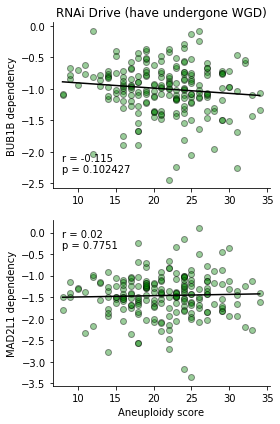

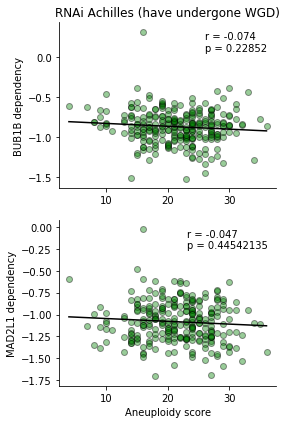

In [35]:
### want to do the same thing but now looking at lines that have at least one WGD



fig,axx = plt.subplots(2,1,figsize=(4,6))

sh = set(full_anot_CCLE.index & gene_effect_rnai_drive.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] > 0].index)

axx[0].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_drive.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)



axx[1].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('RNAi Drive (have undergone WGD)')
plt.tight_layout()
plt.savefig('fig2f/corr_rnai_drive_SPEARMAN_AT_LEAST_1_WGD.pdf')

fig,axx = plt.subplots(2,1,figsize=(4,6))

sh = set(full_anot_CCLE.index & gene_effect_rnai_achilles.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] > 0].index)

axx[0].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,5)),frameon=False)



axx[1].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.spearmanr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('RNAi Achilles (have undergone WGD)')
plt.tight_layout()
plt.savefig('fig2f/corr_rnai_achilles_SPEARMAN_AT_LEAST_1_WGD.pdf')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


MAD2L1 dependency and expression : r = -0.03235797620807755        p = 0.6307880609120353
MAD2L1 dependency and expression : r = -0.05513460365796976        p = 0.41259725300821126


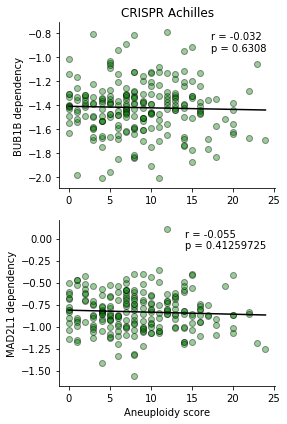

In [60]:
fig,axx = plt.subplots(2,1,figsize=(4,6))

CCLE_ABSOLUTE_combined_table_ = CCLE_ABSOLUTE_combined_table.copy()
CCLE_ABSOLUTE_combined_table_.index = CCLE_ABSOLUTE_combined_table_.loc[:,'DepMap_ID']

sh = set(full_anot.index & gene_effect_crispr_achilles.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table_[CCLE_ABSOLUTE_combined_table_.loc[:,'Genome doublings'] == 0].index)

axx[0].scatter(full_anot.loc[sh,'num_arm_events'],gene_effect_crispr_achilles.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot.loc[sh,'num_arm_events'],gene_effect_crispr_achilles.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot.loc[sh,'num_arm_events'], gene_effect_crispr_achilles.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.pearsonr(full_anot.loc[sh,'num_arm_events'],gene_effect_crispr_achilles.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)



axx[1].plot(np.unique(full_anot.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot.loc[sh,'num_arm_events'], gene_effect_crispr_achilles.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.pearsonr(full_anot.loc[sh,'num_arm_events'],gene_effect_crispr_achilles.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('CRISPR Achilles')
plt.tight_layout()
plt.savefig('fig2f/corr_crispr_achilles.pdf')